In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import json

import os
import sys

In [3]:
OUTPUT_DIR = '../../evaluation/Figures/'

In [4]:
with open ('/home/matthewkenely/Programming/Assignments/ICT3909 Final Year Project in Artificial Intelligence/ICT3909/ablation/images/names.txt', 'r') as f:
    names = f.readlines()
    names = [name.strip() for name in names]

In [5]:
with open ('/home/matthewkenely/Programming/Assignments/ICT3909 Final Year Project in Artificial Intelligence/ICT3909/ablation/images/pair_names.txt', 'r') as f:
    pair_names = f.readlines()
    pair_names = [name.strip() for name in pair_names]

In [6]:
pairs = [(i, i + 10) for i in range(10)]

In [7]:
exc = [
    137,
    293
]

In [8]:
age_group_lists = [
    [12, 20],
    [21, 35],
    [36, 50],
    [51, 70]
]

In [9]:
import firebase_admin
from firebase_admin import credentials, storage

cred = credentials.Certificate('./b-sc-402909-firebase-adminsdk-yuf0e-000953c2f9.json')

if not firebase_admin._apps:
    firebase_admin.initialize_app(cred, {'storageBucket': 'b-sc-402909.appspot.com'})

bucket = storage.bucket()

folder_path = 'pids/'

os.makedirs(folder_path, exist_ok=True)

blobs = bucket.list_blobs(prefix=folder_path)

for blob in blobs:
    # print(f"Processing {blob.name}")
    if blob.name != folder_path:
        # Create the folder if it does not exist
        os.makedirs(os.path.dirname(blob.name), exist_ok=True)

        # Construct the local file path by replacing the folder path in the blob name
        local_file_path = os.path.join(folder_path, blob.name.replace(folder_path, ''))

        # Check if the file already exists
        if os.path.exists(local_file_path):
            # print(f"File {local_file_path} already exists")
            continue

        # Download the file
        blob.download_to_filename(local_file_path)
        # print(f"Downloaded {blob.name} to {local_file_path}")

ModuleNotFoundError: No module named 'firebase_admin'

In [10]:
IMG_DIR = './images'

# Load images
imgs = {}
img_paths = {}

groups = ['A', 'B']

for group in groups:
    imgs[group] = {}
    img_paths[group] = {}

    for im in sorted(os.listdir(IMG_DIR + '/' + group + '/')):
        if im.endswith('.jpg'):
            img_path = IMG_DIR + '/' + group + '/' + im
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            imgs[group][im.split('.')[0]] = img
            img_paths[group][im.split('.')[0]] = img_path

In [11]:
group_count = {
    'A': 0,
    'B': 0
}

age_count = {}

for i in range(12, 75):
    age_count[i] = 0

gender_count = {
    'Male': 0,
    'Female': 0,
    'Other': 0,
    'RatherNotSay': 0
}

group_gender_count = {
    'A': {
        'Male': 0,
        'Female': 0,
        'Other': 0,
        'RatherNotSay': 0
    },
    
    'B': {
        'Male': 0,
        'Female': 0,
        'Other': 0,
        'RatherNotSay': 0
    }
}

group_age_group_count = {
    'A': {
        '12-20': 0,
        '21-35': 0,
        '36-50': 0,
        '51-70': 0
    },
    'B': {
        '12-20': 0,
        '21-35': 0,
        '36-50': 0,
        '51-70': 0
    }
}


In [12]:
df = pd.DataFrame(columns=['Image', 'PID', 'Group', 'Age', 'Gender', 'ClickX', 'ClickY', 'Click'])

pid_gender = {}
pid_age = {}

# Dictionary of 20 copies of df, one for each image
dfs = {}

for i in range(20):
    dfs[i] = df.copy()

HOME_DIR = './pids'

mouse_positions = {}
final_positions = {}

mouse_positions['A'] = {}
mouse_positions['B'] = {}
final_positions['A'] = {}
final_positions['B'] = {}

for i in range(10):
    mouse_positions['A'][i] = {}
    mouse_positions['B'][i] = {}
    final_positions['A'][i] = {}
    final_positions['B'][i] = {}

# Iterate over all participants
for pid in os.listdir(HOME_DIR):
    if int(pid) in exc:
        continue

    # For each participant, extract info{pid}.json and the mousemovements directory
    info_path = os.path.join(HOME_DIR, pid, f'info{pid}.json')
    mousemovements_path = os.path.join(HOME_DIR, pid, 'mousemovements')

    # Load the info file
    with open(info_path, 'r') as f:
        info = json.load(f)

    # Extract participant info
    group = info['group']
    age = info['age']
    gender = info['gender']

    if gender not in ['Male', 'Female']:
        continue

    # print(group, age, gender)
        

    try:
        # Load the mouse movements - each image has its own directory with a single json file named mousemovements{pid}.json
        for im_no in sorted(os.listdir(mousemovements_path)):
            im_path = os.path.join(mousemovements_path, im_no)
            json_path = os.path.join(im_path, f'mousemovements{pid}.json')
            
            with open(json_path, 'r') as f:
                p_json = json.load(f)
                mouse_positions[group][int(im_no)][pid] = p_json['mousePositions']
                final_positions[group][int(im_no)][pid] = p_json['finalPosition']

                ind = im_no

                if group == 'B':
                    ind = int(im_no) + 10

                dfs[int(ind)] = dfs[int(ind)].append({
                    'Image': im_no,
                    'PID': pid,
                    'Group': group,
                    'Age': int(age),
                    'Gender': gender,
                    'ClickX': p_json['finalPosition'][0],
                    'ClickY': p_json['finalPosition'][1],
                    'Click': tuple(p_json['finalPosition']),
                    }, ignore_index=True)

    except FileNotFoundError:
        print(f"Error processing {pid} - FileNotFoundError")
        continue

/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

Error processing 330 - FileNotFoundError
Error processing 352 - FileNotFoundError


/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

Error processing 351 - FileNotFoundError


/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

Error processing 10 - FileNotFoundError
Error processing 355 - FileNotFoundError


/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

Error processing 306 - FileNotFoundError
Error processing 345 - FileNotFoundError
Error processing 86 - FileNotFoundError


/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

Error processing 29 - FileNotFoundError
Error processing 284 - FileNotFoundError


/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

Error processing 262 - FileNotFoundError


/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

Error processing 346 - FileNotFoundError


/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

Error processing 203 - FileNotFoundError


/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

Error processing 114 - FileNotFoundError


/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[int(ind)] = dfs[int(ind)].append({
/tmp/ipykernel_36982/1827226187.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

**Shapiro & Levenes**

**ANOVA**

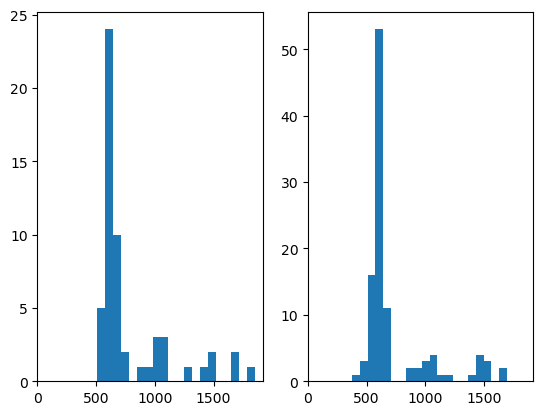

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 56 and the array at index 1 has size 107

In [13]:
for im in range(20):
    df = dfs[im].copy()
    df_male = df[df['Gender'] == 'Male']
    df_female = df[df['Gender'] == 'Female']
    # plot freq bar chart of df['ClickX'] for im
    plt.figure()
    plt.subplot(121)
    plt.hist(df_male['ClickX'], bins=20)
    plt.xlim(0, 1920)
    plt.subplot(122)
    plt.hist(df_female['ClickX'], bins=20)
    plt.xlim(0, 1920)
    plt.show()

    # Calculate spearmans coefficient
    from scipy import stats
    print(stats.spearmanr(df_male['ClickX'], df_female['ClickX']))

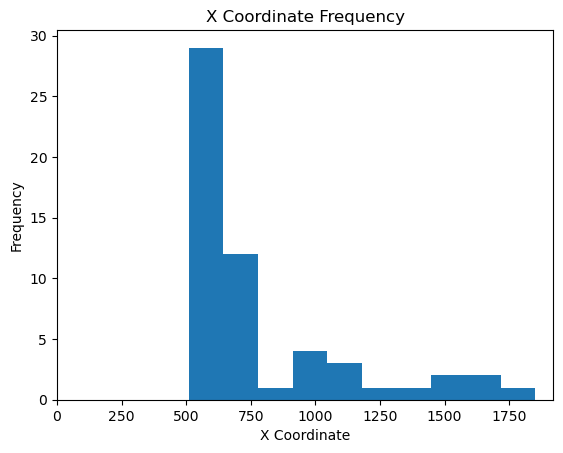

In [14]:
# plot freq bar chart of df['ClickX']
plt.figure()
plt.hist(df[df['Gender'] == 'Male']['ClickX'], bins=10)
plt.xlabel('X Coordinate')
plt.ylabel('Frequency')
plt.title('X Coordinate Frequency')
plt.xlim(0, 1920)
plt.show()


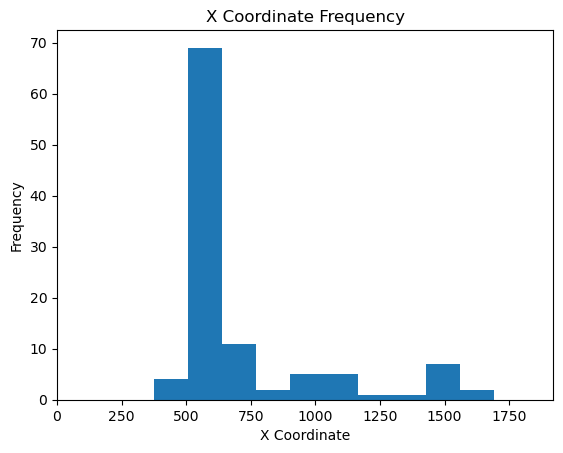

In [15]:
# plot freq bar chart of df['ClickX']
plt.figure()
plt.hist(df[df['Gender'] == 'Female']['ClickX'], bins=10)
plt.xlabel('X Coordinate')
plt.ylabel('Frequency')
plt.title('X Coordinate Frequency')
plt.xlim(0, 1920)
plt.show()


In [37]:
len(gender_click_y_data[1])

56

In [41]:
gender_click_x_data

array([[625, 645, 650, 615, 615, 877, 621, 613, 489, 558, 1078, 920, 624,
        540, 570, 1646, 607, 1499, 587, 475, 571, 660, 1467, 601, 617,
        1190, 596, 571, 592, 670, 645, 1693, 591, 596, 655, 1408, 539,
        596, 970, 597, 839, 634, 1447, 600, 640, 594, 562, 606, 543, 572,
        596, 560, 625, 624, 601, 587],
       [604, 607, 560, 608, 694, 646, 650, 615, 1074, 1675, 710, 601,
        604, 767, 581, 1035, 604, 670, 570, 584, 601, 1046, 587, 1061,
        586, 567, 1067, 599, 615, 1450, 651, 597, 606, 580, 605, 1275,
        951, 1440, 613, 1656, 995, 629, 1455, 650, 645, 645, 741, 905,
        606, 545, 612, 681, 1852, 613, 599, 510]], dtype=object)

In [50]:
gender_click_x_data[0].shape

(56,)

In [69]:
len(gender_click_x_data[1])

55

In [87]:
indices

array([ 93,  86,  82,  50, 136,  59, 144,  22, 124,  80,  20,  43, 159,
        76,  81,  69, 160, 162])

In [102]:
from scipy.stats import chi2_contingency, f_oneway, boxcox, shapiro, norm, levene, f, mannwhitneyu, kruskal

gender_u_df = pd.DataFrame(columns=['Image', 'p (x)', 'U (x)', 'p (y)', 'U (y)'])
age_kruskal_df = pd.DataFrame(columns=['Image',  "Levene's p (x)",  'p (x)', 'H (x)', "Levene's p (y)", 'p (y)', 'H (y)'])

for i in dfs:
    df = dfs[i].copy()

    # df.to_csv(f'./data/{i}.csv', index=False)

    gender_groups = df['Gender'].unique()
    gender_click_x_data = [df[df['Gender'] == group]['ClickX'] for group in gender_groups]
    gender_click_y_data = [df[df['Gender'] == group]['ClickY'] for group in gender_groups]

    # gender_click_x_data[0] = gender_click_x_data[0][:56]
    # gender_click_y_data[0] = gender_click_y_data[0][:56]

    # Sample the larger group
    # 56 random indices from a list of 104 
    all_indices = gender_click_x_data[0].index
    max_index = len(gender_click_x_data[1])
    indices = np.random.choice(all_indices, max_index, replace=False)
    print(max_index)

    gender_click_x_data[0] = gender_click_x_data[0][indices]
    gender_click_y_data[0] = gender_click_y_data[0][indices]

    gender_click_x_data = np.array(gender_click_x_data, dtype=np.int32)
    gender_click_y_data = np.array(gender_click_y_data, dtype=np.int32)
    
    # transformed_click_x_data = [boxcox(click_x_data, lmbda=None)[0] for click_x_data in gender_click_x_data]
    # transformed_click_y_data = [boxcox(click_y_data, lmbda=None)[0] for click_y_data in gender_click_y_data]

    # f_gender_x, p_gender_x = np.round(f_oneway(*gender_click_x_data), 4)
    # f_gender_y, p_gender_y = np.round(f_oneway(*gender_click_y_data), 4)

    f_gender_x, p_gender_x = np.round(mannwhitneyu(gender_click_x_data[0], gender_click_x_data[1], alternative='two-sided', method='exact'), 4)
    f_gender_y, p_gender_y = np.round(mannwhitneyu(gender_click_y_data[0], gender_click_y_data[1], alternative='two-sided', method='exact'), 4)

    # ANOVA for age -> click
    age_labels = ['12-20', '21-35', '35-50', '51-70']
    age_bins = [12, 21, 35, 50, 70]
    df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

    age_groups = age_labels
    age_click_x_data = [df[df['AgeGroup'] == group]['ClickX'] for group in age_groups]
    age_click_y_data = [df[df['AgeGroup'] == group]['ClickY'] for group in age_groups]


    # f_age_x, p_age_x = np.round(f_oneway(*age_click_x_data), 4)
    # f_age_y, p_age_y = np.round(f_oneway(*age_click_y_data), 4)
    
    f_age_x, p_age_x = np.round(kruskal(*age_click_x_data), 4)
    f_age_y, p_age_y = np.round(kruskal(*age_click_y_data), 4)

    gender_u_df = gender_u_df.append({
        'Image': i,
        'U (x)': f_gender_x,
        'p (x)': p_gender_x,
        'U (y)': f_gender_y,
        'p (y)': p_gender_y
    }, ignore_index=True)

    age_kruskal_df = age_kruskal_df.append({
        'Image': i,
        'H (x)': f_age_x,
        'p (x)': p_age_x,
        'H (y)': f_age_y,
        'p (y)': p_age_y
    }, ignore_index=True)

    # Levene's test for homogeneity of variance
    levenes_results_x = levene(*gender_click_x_data)
    levenes_results_y = levene(*gender_click_y_data)

    p_levenes_x = levenes_results_x.pvalue
    p_levenes_y = levenes_results_y.pvalue

    # gender_u_df.loc[gender_u_df['Image'] == i, "Levene's p (x)"] = p_levenes_x
    # gender_u_df.loc[gender_u_df['Image'] == i, "Levene's p (y)"] = p_levenes_y

    age_kruskal_df.loc[age_kruskal_df['Image'] == i, "Levene's p (x)"] = p_levenes_x
    age_kruskal_df.loc[age_kruskal_df['Image'] == i, "Levene's p (y)"] = p_levenes_y

    alpha = 0.05
    # Degrees of freedom
    # dfn = number of groups
    n1 = len(gender_click_x_data[0])
    n2 = len(gender_click_x_data[1])

    gender_u_df.loc[gender_u_df['Image'] == i, "Max U"] = n1 * n2
    gender_u_df.loc[gender_u_df['Image'] == i, "Mean U"] = n1 * n2 / 2

    # Critical value for the F-distribution
    # u_critical_gender = mannwhitneyu(n1, n2).ppf(1 - alpha/2)


    dfn_age = 4
    dfd_age = len(df) - 4

    f_critical_age = f.ppf(1 - alpha, dfn_age, dfd_age)

    print(f'F_critical age: {f_critical_age}')



56
F_critical age: 2.428522132604465
55
F_critical age: 2.4281638071879574
55
F_critical age: 2.429625041998195
56
F_critical age: 2.4281638071879574
55
F_critical age: 2.4300022939079975
56
F_critical age: 2.4281638071879574
57
F_critical age: 2.428522132604465
55
F_critical age: 2.429252659869135
58
F_critical age: 2.428522132604465
59
F_critical age: 2.4264381557916535
54
F_critical age: 2.429252659869135
55
F_critical age: 2.429252659869135
57
F_critical age: 2.4281638071879574
54


/tmp/ipykernel_36982/3721033143.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gender_u_df = gender_u_df.append({
/tmp/ipykernel_36982/3721033143.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  age_kruskal_df = age_kruskal_df.append({
/tmp/ipykernel_36982/3721033143.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gender_u_df = gender_u_df.append({
/tmp/ipykernel_36982/3721033143.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  age_kruskal_df = age_kruskal_df.append({
/tmp/ipykernel_36982/3721033143.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

F_critical age: 2.43116424264912
55
F_critical age: 2.431561961091796
55
F_critical age: 2.4303845117488283
58
F_critical age: 2.4303845117488283
57
F_critical age: 2.4300022939079975
53
F_critical age: 2.430771794218871
56
F_critical age: 2.4303845117488283


/tmp/ipykernel_36982/3721033143.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gender_u_df = gender_u_df.append({
/tmp/ipykernel_36982/3721033143.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  age_kruskal_df = age_kruskal_df.append({
/tmp/ipykernel_36982/3721033143.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gender_u_df = gender_u_df.append({
/tmp/ipykernel_36982/3721033143.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  age_kruskal_df = age_kruskal_df.append({
/tmp/ipykernel_36982/3721033143.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

In [ ]:
max_f = 1
min_p = 0.05

In [103]:
gender_u_df.to_csv('./data/Tests/gender_u.csv', index=False)
age_kruskal_df.to_csv('./data/Tests/age_kruskal.csv', index=False)

In [ ]:
for i, p in enumerate(gender_anova_df[['p (x)', 'p (y)']].values):
    px, py = p
    if px < min_p or py < min_p:
        Fx, Fy = gender_anova_df[['F (x)', 'F (y)']].values[i]
        print(f"Image {i} has gender p-values below threshold: {px}, {py} | F-values: {Fx}, {Fy}")

for i, p in enumerate(age_anova_df[['p (x)', 'p (y)']].values):
    px, py = p
    if px < min_p or py < min_p:
        Fx, Fy = age_anova_df[['F (x)', 'F (y)']].values[i]
        print(f"Image {i} has age p-values below threshold: {px}, {py} | F-values: {Fx}, {Fy}")


Image 3 has gender p-values below threshold: 0.0441, 0.3882 | F-values: 2.7575, 1.0136
Image 12 has gender p-values below threshold: 0.0364, 0.1669 | F-values: 3.3826, 1.8103
Image 1 has age p-values below threshold: 0.0254, 0.2554 | F-values: 3.1853, 1.3651
Image 4 has age p-values below threshold: 0.0239, 0.7777 | F-values: 3.2347, 0.366
Image 6 has age p-values below threshold: 0.6485, 0.0095 | F-values: 0.5506, 3.9465
Image 14 has age p-values below threshold: 0.9072, 0.0025 | F-values: 0.1839, 5.0018
Image 17 has age p-values below threshold: 0.0163, 0.5545 | F-values: 3.5348, 0.6982


In [ ]:
min_gender_p = np.min(gender_anova_df[['p (x)', 'p (y)']].values)
min_age_p = np.min(age_anova_df[['p (x)', 'p (y)']].values)

max_gender_f = np.max(gender_anova_df[['F (x)', 'F (y)']].values)
max_age_f = np.max(age_anova_df[['F (x)', 'F (y)']].values)

In [ ]:
print(min_gender_p, min_age_p)

0.0364 0.0025


In [ ]:
group_count['A']

178

In [ ]:
group_count['B']

177

In [ ]:
group_a_ratio = group_count['A'] / (group_count['A'] + group_count['B'])
group_b_ratio = group_count['B'] / (group_count['A'] + group_count['B'])

print(f'Group A ratio: {group_a_ratio:.2f} | Group B ratio: {group_b_ratio:.2f}')

Group A ratio: 0.50 | Group B ratio: 0.50


In [ ]:
male_ratio = gender_count['Male'] / (gender_count['Male'] + gender_count['Female'] + gender_count['Other'] + gender_count['RatherNotSay'])
female_ratio = gender_count['Female'] / (gender_count['Male'] + gender_count['Female'] + gender_count['Other'] + gender_count['RatherNotSay'])

print(f'Male ratio: {male_ratio:.2f} | Female ratio: {female_ratio:.2f}')

Male ratio: 0.34 | Female ratio: 0.65


In [ ]:
group_gender_count

{'A': {'Male': 60, 'Female': 115, 'Other': 2, 'RatherNotSay': 1},
 'B': {'Male': 60, 'Female': 115, 'Other': 1, 'RatherNotSay': 0}}

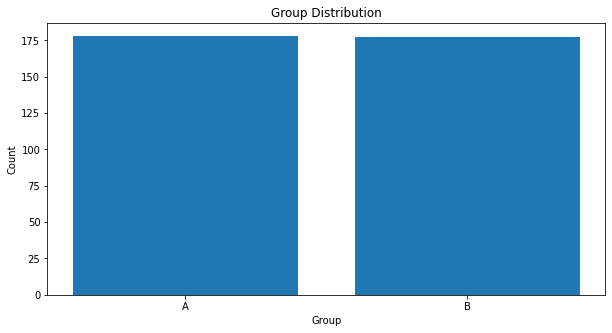

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(group_count.keys(), group_count.values())


plt.xlabel('Group')
plt.ylabel('Count')

plt.title('Group Distribution')

# plt.grid()

plt.show()

In [ ]:
group_age_group_count

{'A': {'12-20': 54, '21-35': 54, '36-50': 41, '51-70': 29},
 'B': {'12-20': 32, '21-35': 48, '36-50': 48, '51-70': 48}}

In [ ]:
gender_count_keyfix = list(gender_count.keys()).copy() 
gender_count_keyfix[-1] = 'RNS'

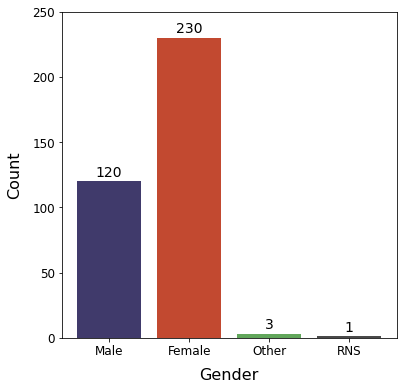

In [ ]:
plt.figure(figsize=(6, 6))
colors = ['#403a6b', '#c24930', '#61a65b', '#4a4a4a']

plt.bar(gender_count_keyfix, gender_count.values(), color=colors)
# Add number in text above
for i, count in enumerate(gender_count.values()):
    plt.text(i, count + 4, str(count), ha='center', fontsize=14)

# Add padding to top
plt.ylim(0, 250)


plt.xlabel('Gender', fontsize=16, labelpad=10)
plt.ylabel('Count', fontsize=16, labelpad=10)

# increase letter spacing
plt.xticks(fontsize=12, rotation=0, ha='center', va='top', rotation_mode='anchor', fontstretch='extra-expanded')
plt.yticks(fontsize=12)

# plt.title('Gender Distribution')

# plt.grid()

plt.show()

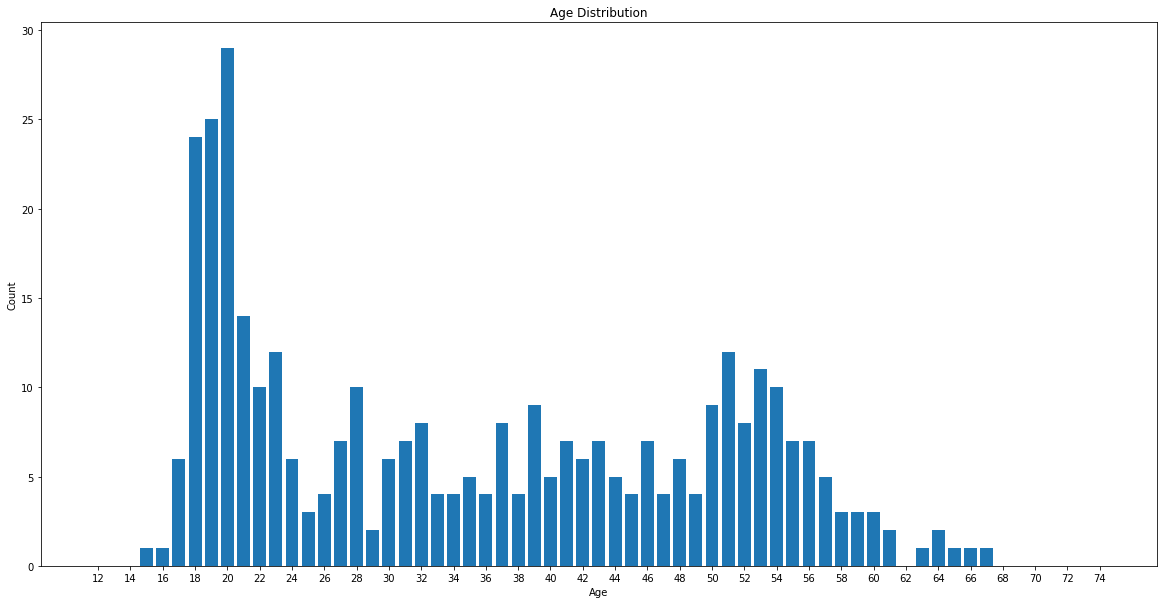

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(age_count.keys(), age_count.values())


plt.xlabel('Age')
plt.ylabel('Count')

plt.xticks(range(12, 75, 2))

plt.title('Age Distribution')

# plt.grid()

plt.show()

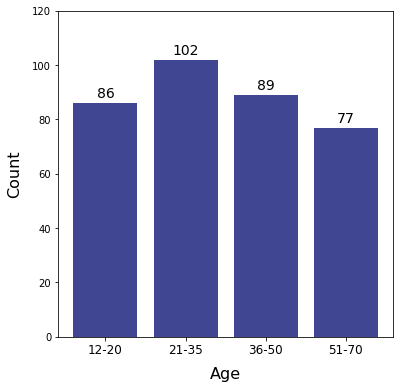

In [ ]:
age_count_quantised = {}

ranges = [
    (12, 20),
    (21, 35),
    (36, 50),
    (51, 70)
]

for i in range(len(ranges)):
    age_count_quantised[i] = 0
    for j in range(ranges[i][0], ranges[i][1] + 1):
        age_count_quantised[i] += age_count[j]



plt.figure(figsize=(6, 6))
colors = ['#404691', '#404691', '#404691', '#404691']
plt.bar(age_count_quantised.keys(), age_count_quantised.values(), color=colors)

# Add number in text above
for i, count in enumerate(age_count_quantised.values()):
    plt.text(i, count + 2, str(count), ha='center', fontsize=14)


plt.ylim(0, 120)

plt.xlabel('Age', fontsize=16, labelpad=10)
plt.ylabel('Count', fontsize=16, labelpad=10)

plt.xticks(range(len(ranges)), [f"{r[0]}-{r[1]}" for r in ranges], fontsize=12, rotation=0, ha='center', va='top', rotation_mode='anchor', fontstretch='extra-expanded')

plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
colors = ['#403a6b', '#c24930', '#61a65b', '#4a4a4a']

plt.bar(gender_count_keyfix, gender_count.values(), color=colors)
# Add number in text above
for i, count in enumerate(gender_count.values()):
    plt.text(i, count + 4, str(count), ha='center', fontsize=14)

# Add padding to top
plt.ylim(0, 250)


plt.xlabel('Gender', fontsize=16, labelpad=10)
plt.ylabel('Count', fontsize=16, labelpad=10)

# increase letter spacing
plt.xticks(fontsize=12, rotation=0, ha='center', va='top', rotation_mode='anchor', fontstretch='extra-expanded')
plt.yticks(fontsize=12)

# plt.title('Gender Distribution')

# plt.grid()

plt.show()

In [ ]:
def add_circle_to_heatmap(heatmap, x, y, radius, intensity=1):
    y_min, y_max = max(0, int(y - radius)), min(heatmap.shape[0], int(y + radius))
    x_min, x_max = max(0, int(x - radius)), min(heatmap.shape[1], int(x + radius))

    for i in range(y_min, y_max):
        for j in range(x_min, x_max):
            distance = np.sqrt((i - y)**2 + (j - x)**2)
            if distance <= radius:
                heatmap[i, j] += intensity

In [ ]:
# Interpolate mouse positions
mouse_positions_interpolated = {}

for group in mouse_positions:
    mouse_positions_interpolated[group] = {}
    
    for im_no in mouse_positions[group]:
        mouse_positions_interpolated[group][im_no] = {}

        for pid in mouse_positions[group][im_no]:
            mouse_positions_interpolated[group][im_no][pid] = []

            positions = mouse_positions[group][im_no][pid]

            for i in range(len(positions)):
                if i == 0:
                    mouse_positions_interpolated[group][im_no][pid].append(positions[i])

                x0, y0 = positions[i - 1]
                x1, y1 = positions[i]

                x = np.linspace(x0, x1, num=10)
                y = np.linspace(y0, y1, num=10)

                for j in range(10):
                    mouse_positions_interpolated[group][im_no][pid].append((x[j], y[j]))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from matplotlib.colors import LinearSegmentedColormap

ncolors = 256
color_array = plt.get_cmap('jet')(np.linspace(0, 1, 256))
gray_array = plt.get_cmap('bwr')(np.linspace(0, 1, 256))

# Make it so color_array is transparent at 0 and solid at 1
color_array[:,-1] = np.linspace(0,1.0,ncolors)
gray_array[:,-1] = np.linspace(0,1.0,ncolors)


map_object = LinearSegmentedColormap.from_list(name='coolwarm_alpha',colors=color_array)
plt.register_cmap(cmap=map_object)

map_object = LinearSegmentedColormap.from_list(name='gray_alpha',colors=gray_array)
plt.register_cmap(cmap=map_object)

../../evaluation/Figures/Custom (DESKTOP)/DESKTOP_A_MOUSE.png


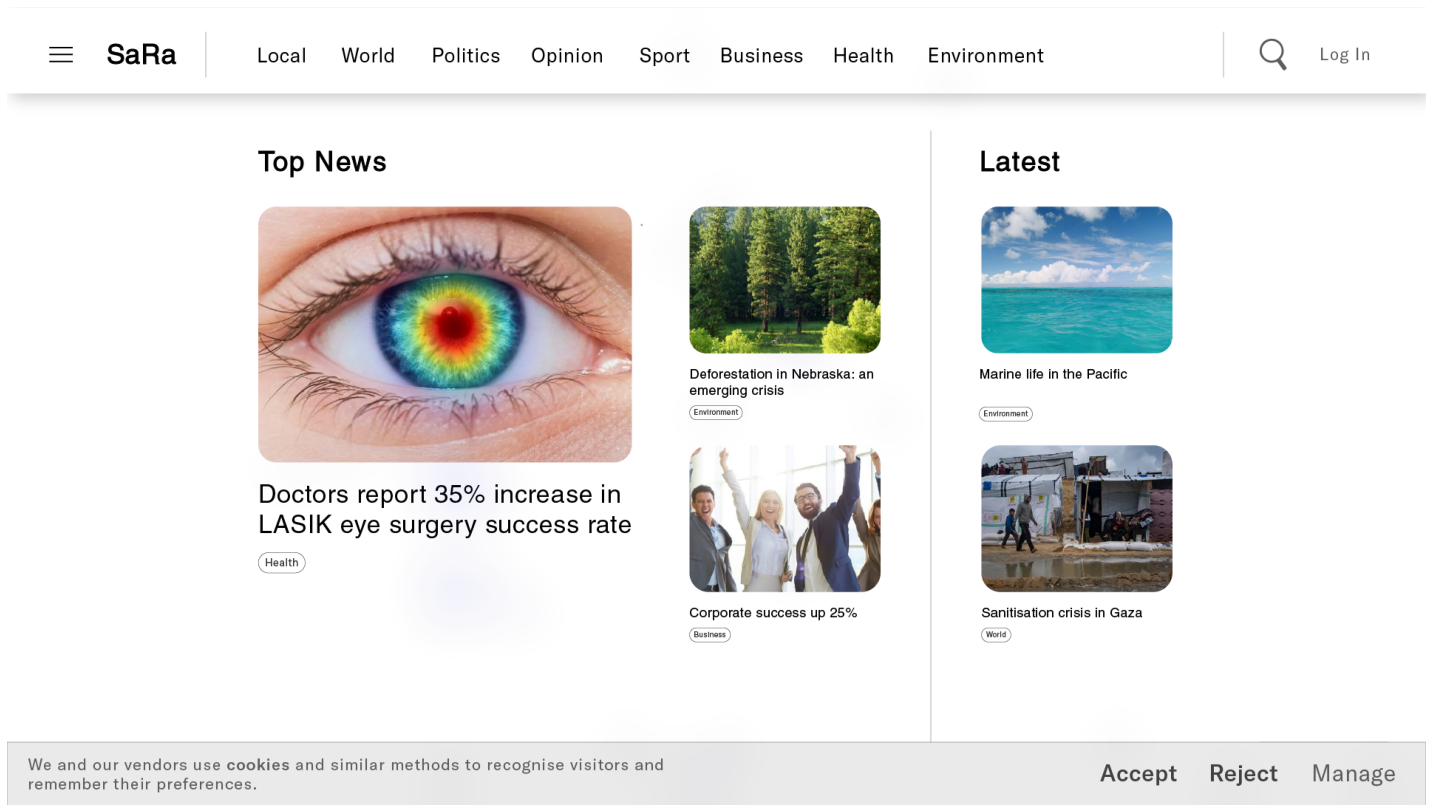

../../evaluation/Figures/Custom (DESKTOP)/DESKTOP_B_MOUSE.png


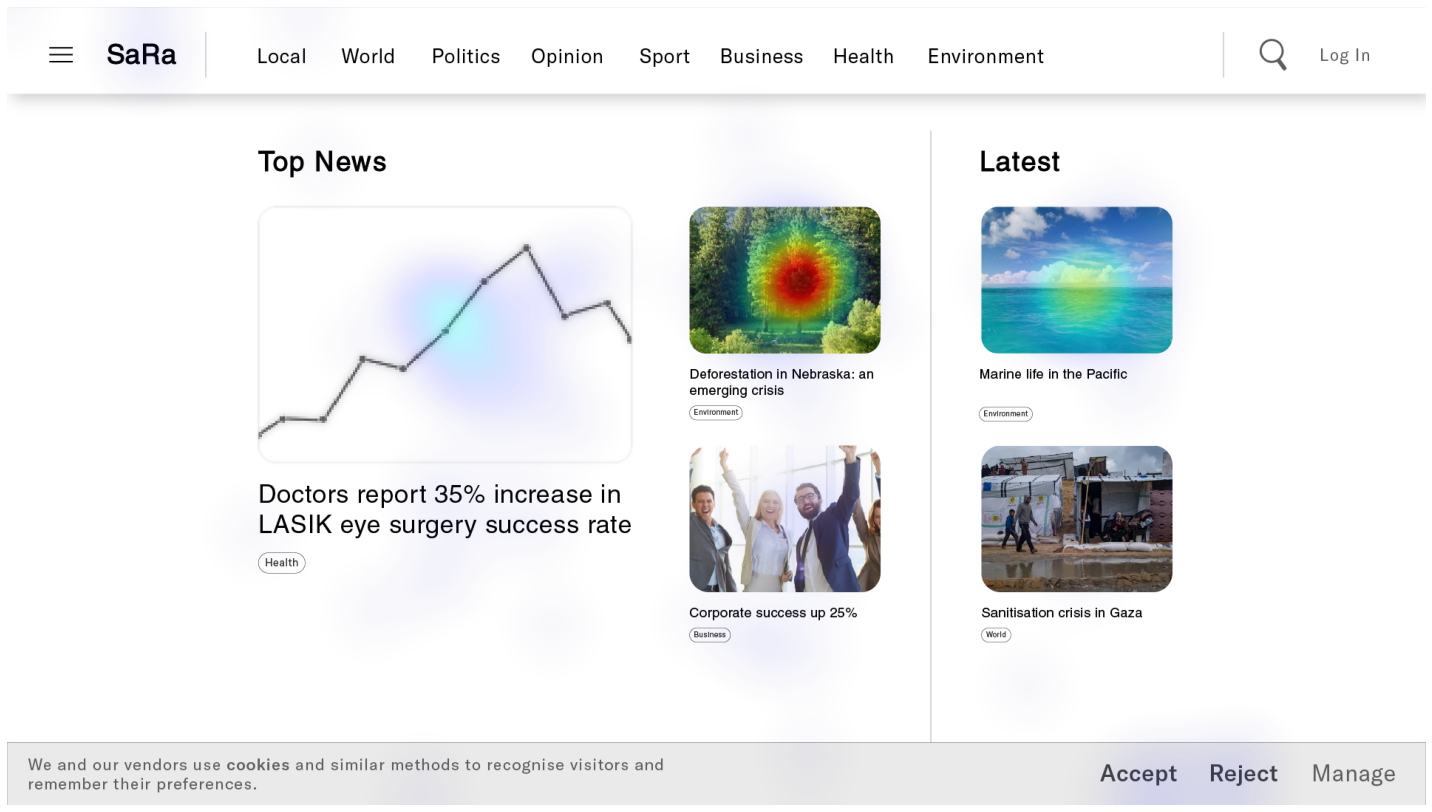

../../evaluation/Figures/Custom (MOBILE)/MOBILE_A_MOUSE.png


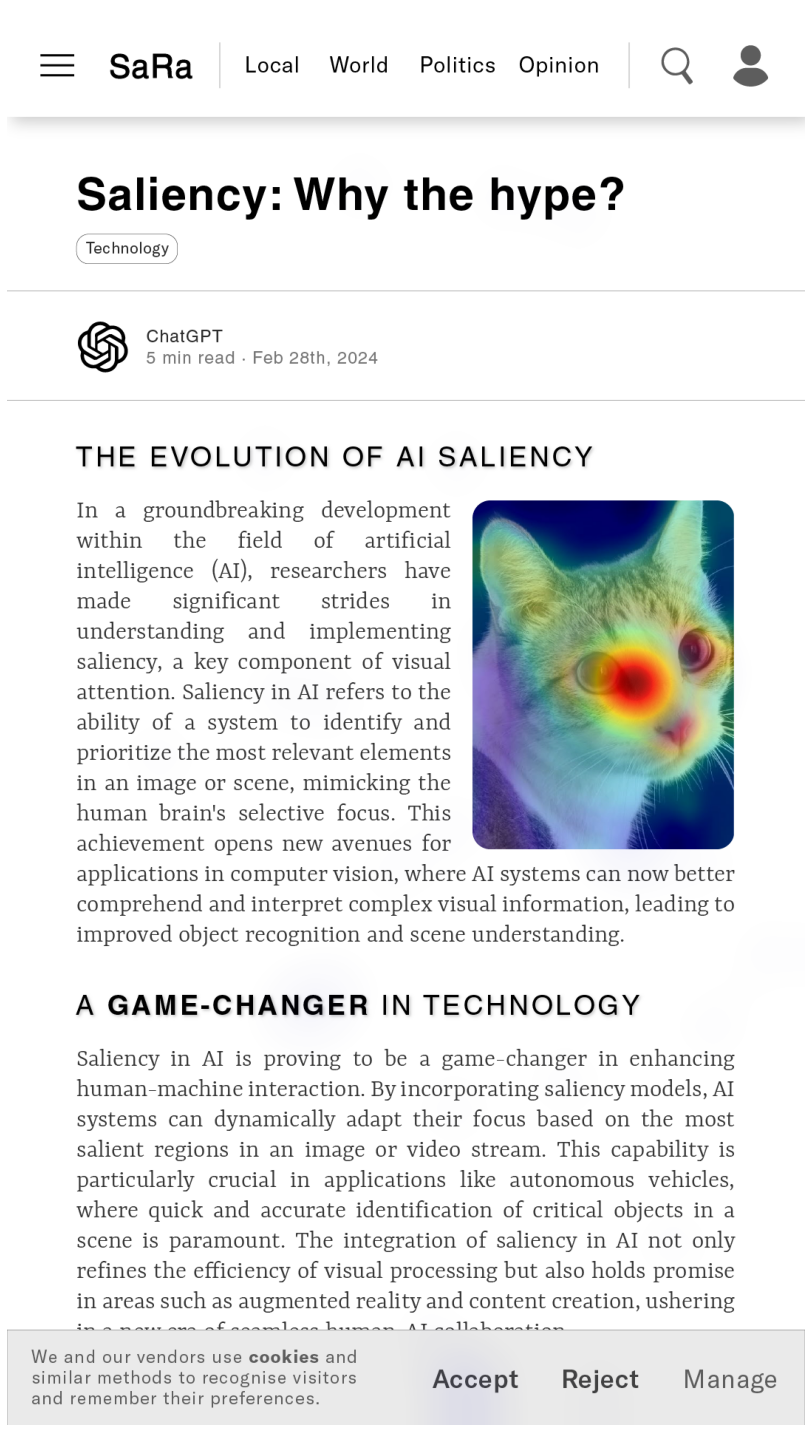

../../evaluation/Figures/Custom (MOBILE)/MOBILE_B_MOUSE.png


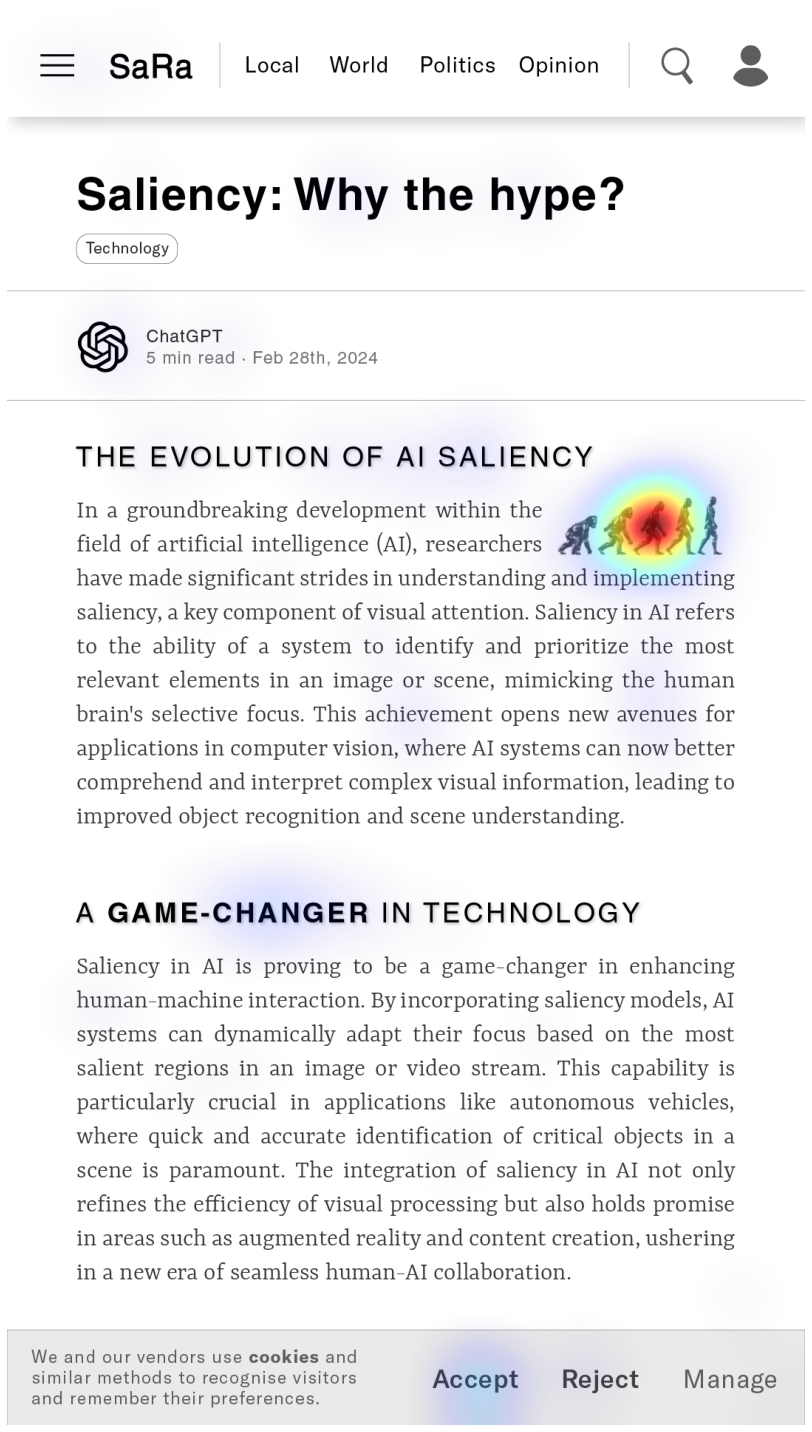

KeyboardInterrupt: 

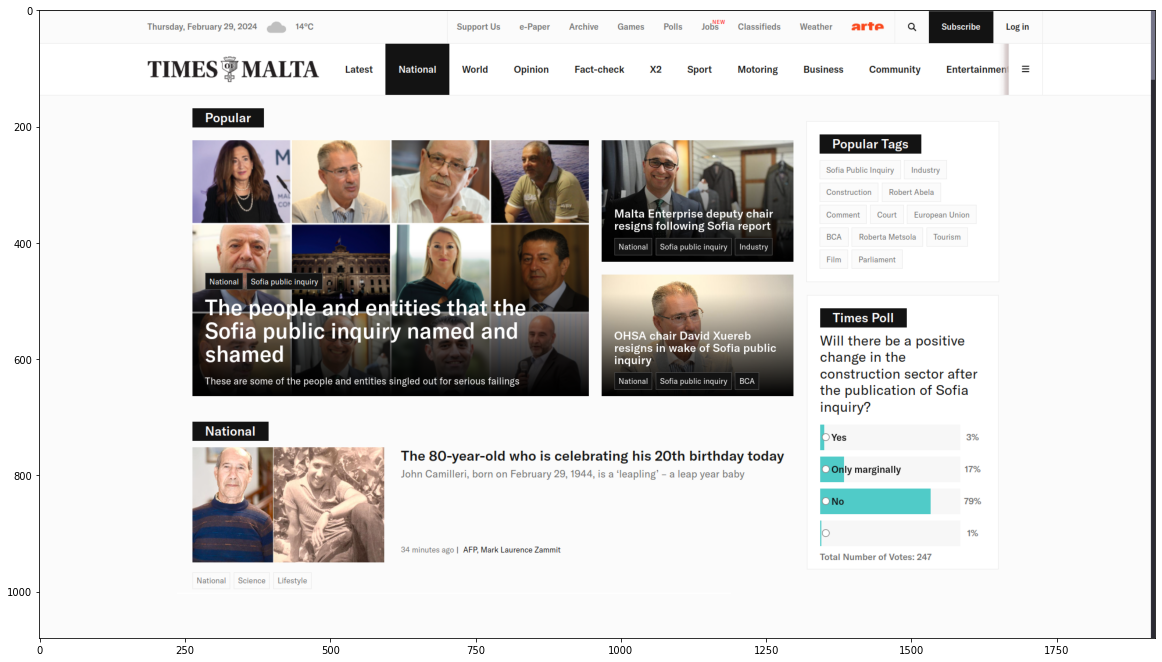

In [ ]:
for p, im_no in enumerate(range(10)):
    g = 1

    for group in ['A', 'B']:
        plt.figure(figsize=(20, 20))
        # plt.subplot(1, 2, g)
        plt.imshow(cv2.cvtColor(cv2.imread(img_paths[group][str(im_no)]), cv2.COLOR_BGR2RGB))
        # plt.imshow(cv2.cvtColor(cv2.imread(img_paths[group][str(im_no)]), cv2.COLOR_BGR2GRAY), cmap='gray')

        img_x, img_y = imgs[group][str(im_no)].shape[1], imgs[group][str(im_no)].shape[0]

        # Add all final positions to a heatmap
        heatmap = np.zeros((int(img_y), int(img_x)))
        movements = np.zeros((int(img_y), int(img_x)))

        for pid in mouse_positions_interpolated[group][im_no]:
            positions = mouse_positions_interpolated[group][im_no][pid]

            for i in range(len(positions)):
                x, y = positions[i]

                add_circle_to_heatmap(movements, x, y, radius=1, intensity=1)

        # Normalise movements
        movements = movements / np.max(movements)
        movements_out = movements.copy()
        # movements_out = movements > 0
        # movements_out = movements_out.astype(np.uint8) * 255

        # movements = cv2.GaussianBlur(movements, (13, 13), 10)
        movements_out = cv2.GaussianBlur(movements_out, (101, 101), 50)

        for pid in final_positions[group][im_no]:
            final_position = final_positions[group][im_no][pid].copy()
            add_circle_to_heatmap(heatmap, final_position[0], final_position[1], radius=50, intensity=20)

        # plt.plot(img_x / 2, img_y / 2, 'r+', markersize=20, markeredgewidth=1, alpha=0.3)

        # Normalise heatmap
        # heatmap = heatmap / np.max(heatmap)
        # Make lower values more visible
        heatmap = heatmap // 2

        heatmap = cv2.GaussianBlur(heatmap, (101, 101), 50)


        # plt.imshow(movements_out, cmap='gray_alpha', alpha=1)
        # plt.imshow(heatmap, cmap='coolwarm_alpha', alpha=1)
        plt.imshow(heatmap, cmap='coolwarm_alpha', alpha=0.8)

        # output_a = OUTPUT_DIR + f'{names[pairs[p][0]]}' + '/' + pair_names[pairs[p][0]] + '.png'
        

        output = OUTPUT_DIR + f'{names[pairs[p][0]]}' + '/' + pair_names[pairs[p][g - 1]] + '_MOUSE.png'
        print(output)

        plt.axis('off')
        plt.tight_layout()

        plt.savefig(output, bbox_inches='tight', pad_inches=0)

        plt.show()

        g += 1


**Significant statistical differences in age**

[12, 20]
[21, 35]
[36, 50]
[51, 70]


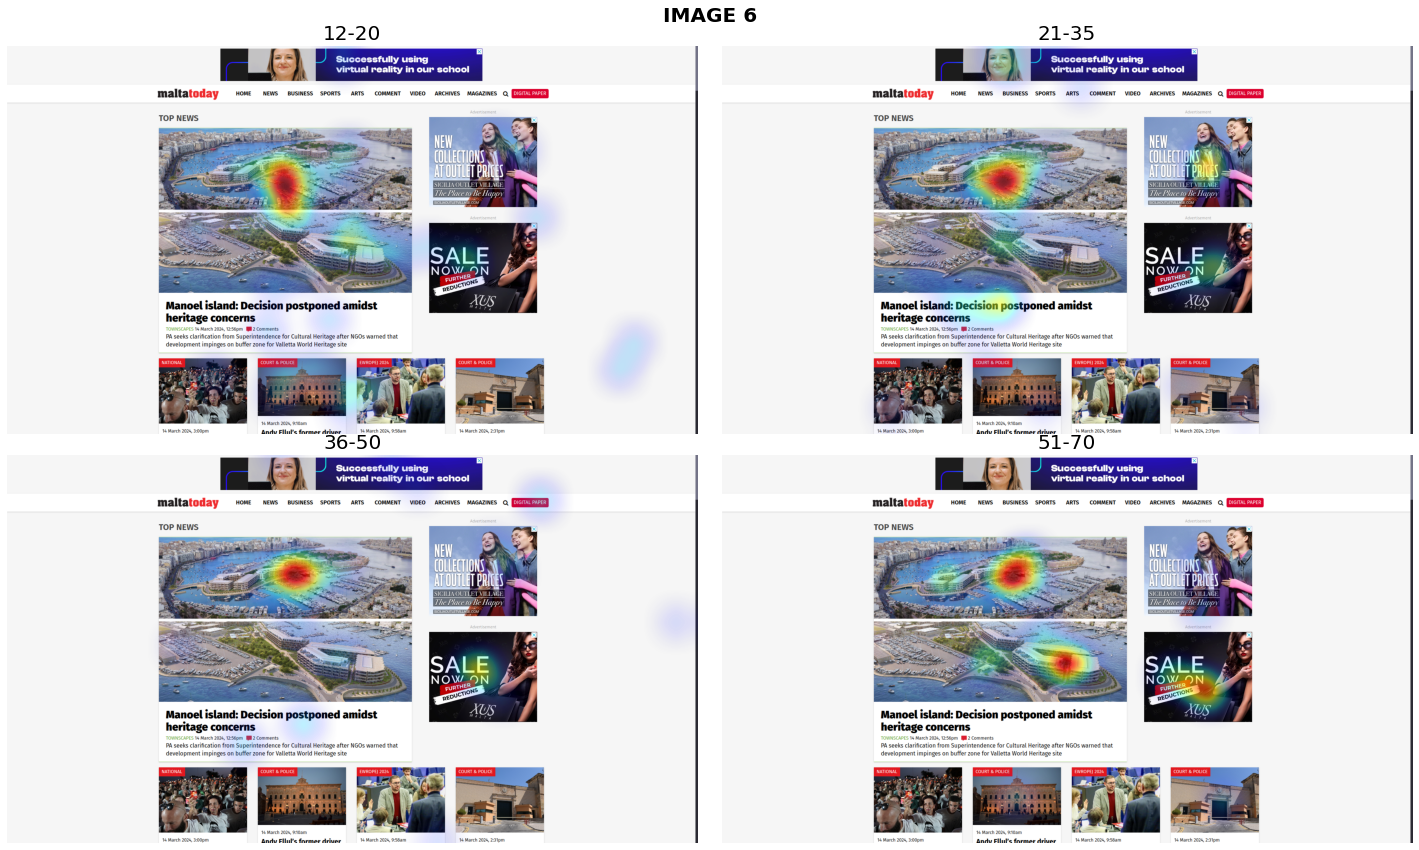

In [ ]:
group = 'A'
im_no = 6

plt.figure(figsize=(20, 12))
plt.suptitle('IMAGE 6', fontsize=20, fontweight='bold')

# Subplot for each age group
for i, age_group in enumerate(age_group_lists):
    print(age_group)
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(cv2.imread(img_paths[group][str(im_no)]), cv2.COLOR_BGR2RGB))
    plt.title(f'{age_group[0]}-{age_group[1]}', fontsize=20)

    img_x, img_y = imgs[group][str(im_no)].shape[1], imgs[group][str(im_no)].shape[0]

    heatmap = np.zeros((int(img_y), int(img_x)))

    for pid in final_positions[group][im_no]:
        if pid_age[int(pid)] >= age_group[0] and pid_age[int(pid)] <= age_group[1]:
            final_position = final_positions[group][im_no][pid].copy()
            add_circle_to_heatmap(heatmap, final_position[0], final_position[1], radius=50, intensity=20)
            
    heatmap = heatmap // 2

    heatmap = cv2.GaussianBlur(heatmap, (101, 101), 50)

    plt.imshow(heatmap, cmap='coolwarm_alpha', alpha=0.8)
    plt.axis('off')

plt.tight_layout()
plt.show()

[12, 20]
[21, 35]
[36, 50]
[51, 70]


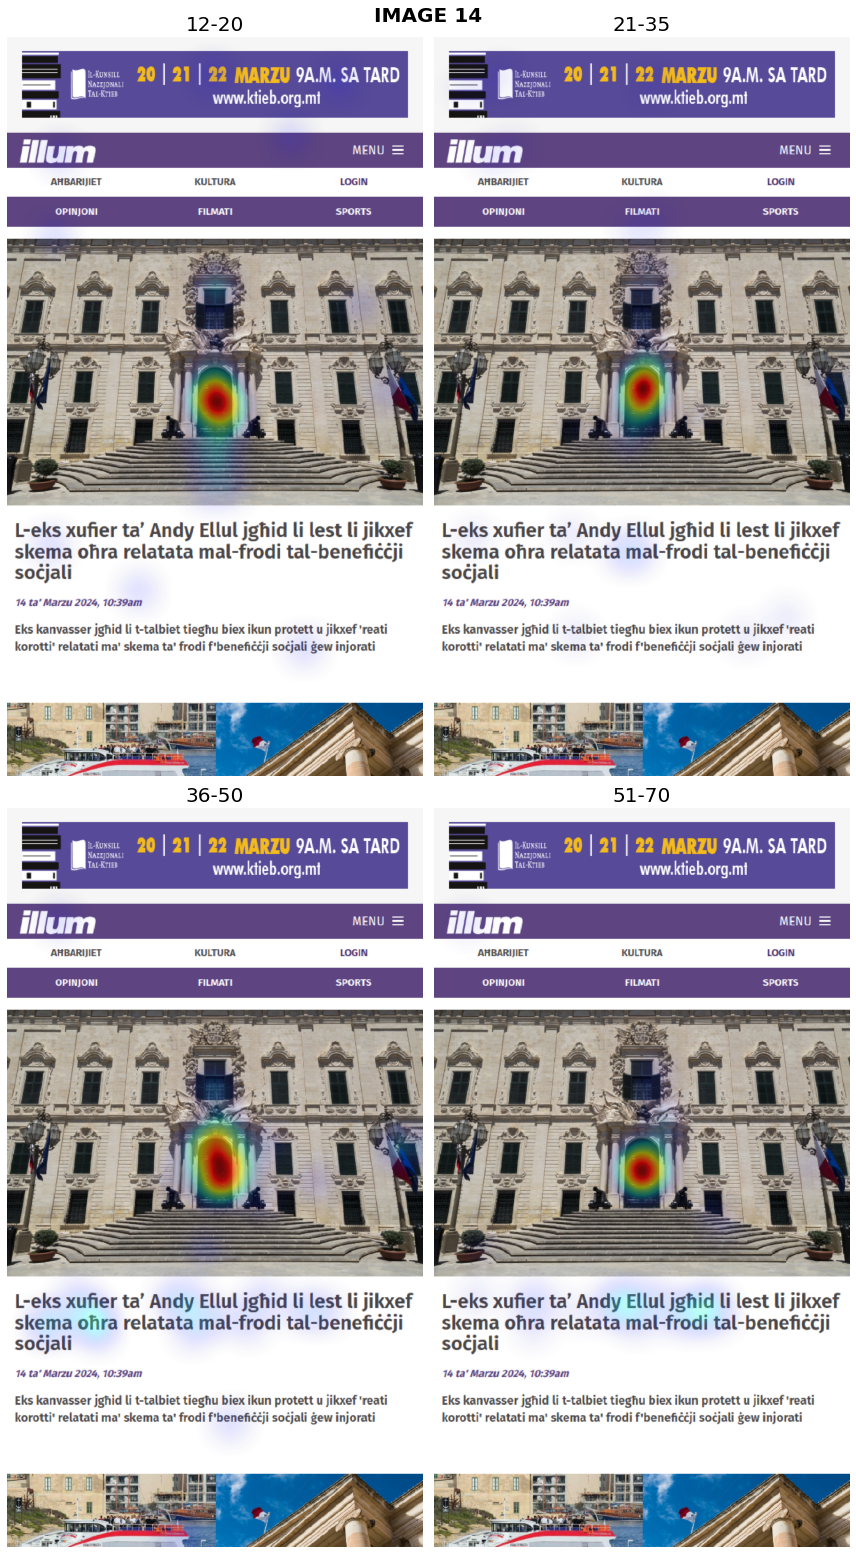

In [ ]:
group = 'B'
im_no = 4

plt.figure(figsize=(12, 22))
plt.suptitle('IMAGE 14', fontsize=20, fontweight='bold')

# Subplot for each age group
for i, age_group in enumerate(age_group_lists):
    print(age_group)
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(cv2.imread(img_paths[group][str(im_no)]), cv2.COLOR_BGR2RGB))
    plt.title(f'{age_group[0]}-{age_group[1]}', fontsize=20)

    img_x, img_y = imgs[group][str(im_no)].shape[1], imgs[group][str(im_no)].shape[0]

    heatmap = np.zeros((int(img_y), int(img_x)))

    for pid in final_positions[group][im_no]:
        if pid_age[int(pid)] >= age_group[0] and pid_age[int(pid)] <= age_group[1]:
            final_position = final_positions[group][im_no][pid].copy()
            add_circle_to_heatmap(heatmap, final_position[0], final_position[1], radius=50, intensity=20)
            
    heatmap = heatmap // 2

    heatmap = cv2.GaussianBlur(heatmap, (101, 101), 50)

    plt.imshow(heatmap, cmap='coolwarm_alpha', alpha=0.8)
    plt.axis('off')

plt.tight_layout()
plt.show()

[12, 20]


[21, 35]
[36, 50]
[51, 70]


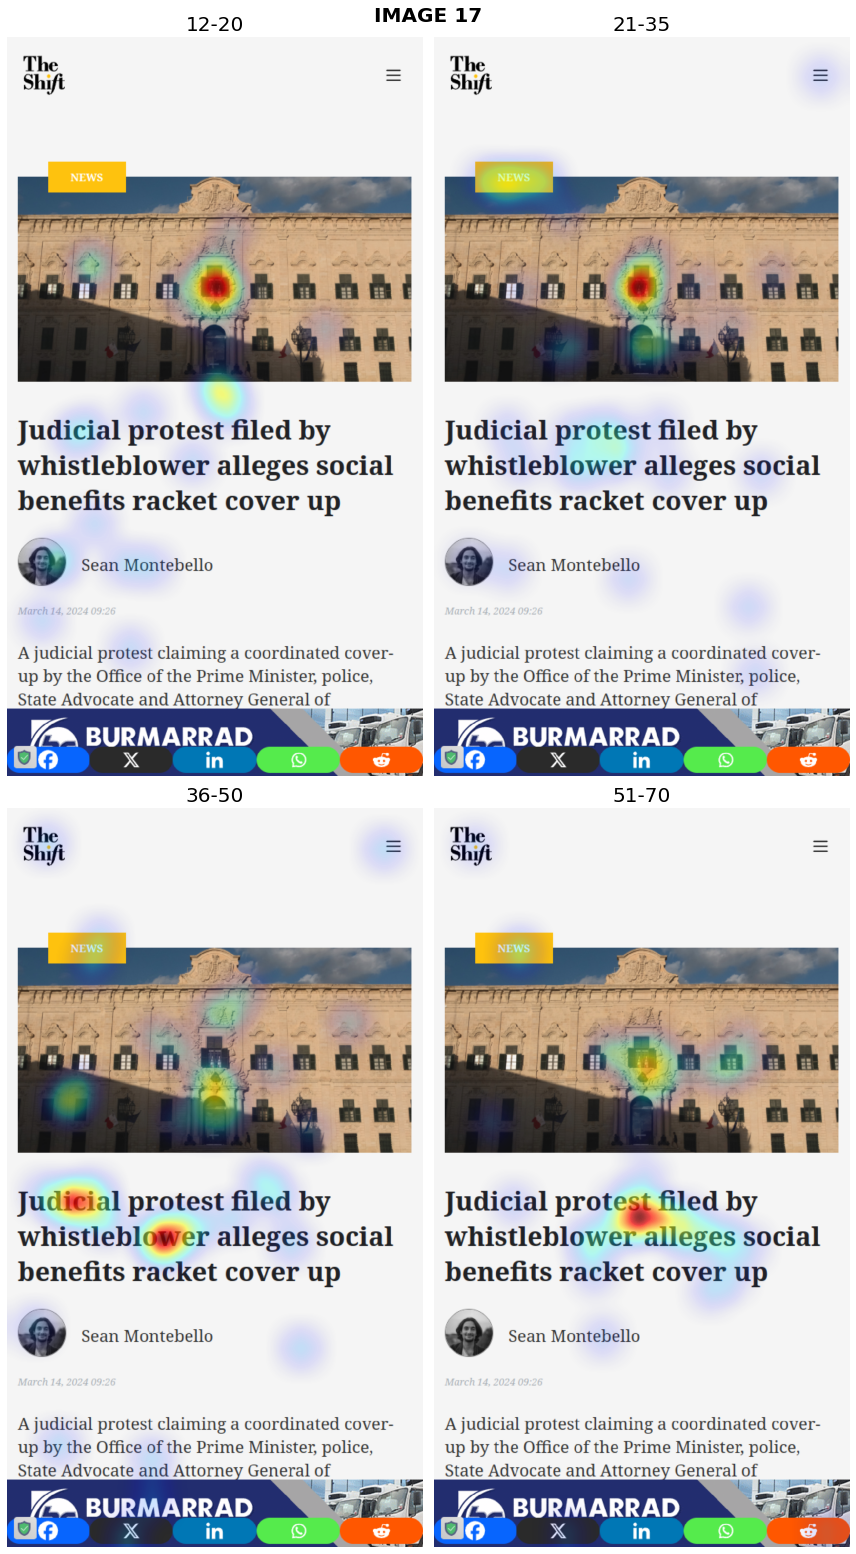

In [ ]:
group = 'B'
im_no = 7

plt.figure(figsize=(12, 22))
plt.suptitle('IMAGE 17', fontsize=20, fontweight='bold')

# Subplot for each age group
for i, age_group in enumerate(age_group_lists):
    print(age_group)
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(cv2.imread(img_paths[group][str(im_no)]), cv2.COLOR_BGR2RGB))
    plt.title(f'{age_group[0]}-{age_group[1]}', fontsize=20)

    img_x, img_y = imgs[group][str(im_no)].shape[1], imgs[group][str(im_no)].shape[0]

    heatmap = np.zeros((int(img_y), int(img_x)))

    for pid in final_positions[group][im_no]:
        if int(pid) not in list(pid_age.keys()):
            continue
        if pid_age[int(pid)] >= age_group[0] and pid_age[int(pid)] <= age_group[1]:
            final_position = final_positions[group][im_no][pid].copy()
            add_circle_to_heatmap(heatmap, final_position[0], final_position[1], radius=50, intensity=20)
            
    heatmap = heatmap // 2

    heatmap = cv2.GaussianBlur(heatmap, (101, 101), 50)

    plt.imshow(heatmap, cmap='coolwarm_alpha', alpha=0.8)
    plt.axis('off')

plt.tight_layout()
plt.show()